In [31]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
np.random.seed(123)

In [52]:
batch_size = 128
num_classes = 10
epochs = 20

In [33]:
# input image dimensions
img_rows, img_cols = 28, 28

In [34]:
# Load pre-shuffled data into train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [35]:
print(x_train.shape)

(60000, 28, 28)


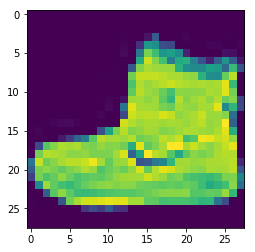

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [37]:
print(K.image_data_format()) # difference between Theano and TensorFlow
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

channels_last


In [38]:
x_train = x_train.astype('float32') # x_train.dtype
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [39]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


In [40]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define model structure

In [53]:
# declaring a sequential model format
model = Sequential()

In [54]:
# declare the input layer
model.add(Flatten(input_shape=input_shape))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# Compile model

In [55]:
model.compile(loss=keras.losses.categorical_crossentropy,
              # optimizer=keras.optimizers.Adadelta(),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [56]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


# Fit model on training data

In [57]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 697us/step - loss: 0.6360 - acc: 0.7680 - val_loss: 0.4595 - val_acc: 0.8330
Epoch 2/20
60000/60000 [==============================] - 46s 769us/step - loss: 0.4283 - acc: 0.8429 - val_loss: 0.4209 - val_acc: 0.8474
Epoch 3/20
60000/60000 [==============================] - 47s 782us/step - loss: 0.3919 - acc: 0.8569 - val_loss: 0.3897 - val_acc: 0.8565
Epoch 4/20
60000/60000 [==============================] - 45s 754us/step - loss: 0.3656 - acc: 0.8659 - val_loss: 0.3856 - val_acc: 0.8612
Epoch 5/20
60000/60000 [==============================] - 47s 779us/step - loss: 0.3437 - acc: 0.8723 - val_loss: 0.3652 - val_acc: 0.8676
Epoch 6/20
60000/60000 [==============================] - 46s 774us/step - loss: 0.3294 - acc: 0.8779 - val_loss: 0.3507 - val_acc: 0.8733
Epoch 7/20
60000/60000 [==============================] - 49s 822us/step - loss: 0.3143 - acc: 0.8836 - val_loss: 0.

# Evaluate model on test data

In [58]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3088473710775375
Test accuracy: 0.8922
